添加去极化噪声和使用量子测量，在给定最优参数的条件下，与实际解的差距

In [1]:
# 导入必要的库

import matplotlib.pyplot as plt

import pennylane as qml
from pennylane import numpy as qml_np

import numpy as np
import time
import VQLS_Noise_until

In [2]:
# 变分量子电路最优参数
w = qml_np.array([3.14161205e+00,  5.80377608e+00,  3.93857269e+00,
         4.71236102e+00,  4.42799279e+00,  5.32962513e+00,
         2.88556879e-05, -6.91562619e-02,  4.79375314e-01])

print('w = ', w)

# 优化器
# optimizer = qml.GradientDescentOptimizer(stepsize=0.1)
optimizer = qml.AdamOptimizer(stepsize=0.1)


w =  [ 3.14161205e+00  5.80377608e+00  3.93857269e+00  4.71236102e+00
  4.42799279e+00  5.32962513e+00  2.88556879e-05 -6.91562619e-02
  4.79375314e-01]


In [3]:
x_normalized = VQLS_Noise_until.x_normalized
qubits = 3

# 表示经典情况下，量子态在每个基向量上的概率
c_probs = (x_normalized) ** 2

# 获得量子电路上的测量概率，测量 2048 次
shots=2048
q_probs_1 = VQLS_Noise_until.prepare_and_sample(w, noise_x=0.001)
q_probs_2 = VQLS_Noise_until.prepare_and_sample(w, noise_x=0.01)
q_probs_3 = VQLS_Noise_until.prepare_and_sample(w, noise_x=0.1)
print("c_probs = ", c_probs)
print("q_probs_1 = ", q_probs_1)
print("q_probs_2 = ", q_probs_2)
print("q_probs_3 = ", q_probs_3)

c_probs =  [0.         0.         0.         0.80898876 0.14044944 0.0505618
 0.         0.        ]
q_probs_1 =  [0.         0.         0.         0.80859375 0.13671875 0.05322266
 0.         0.00146484]
q_probs_2 =  [0.00146484 0.00585938 0.00390625 0.78222656 0.15039062 0.05224609
 0.         0.00390625]
q_probs_3 =  [0.01660156 0.04833984 0.046875   0.65966797 0.11621094 0.0546875
 0.00927734 0.04833984]


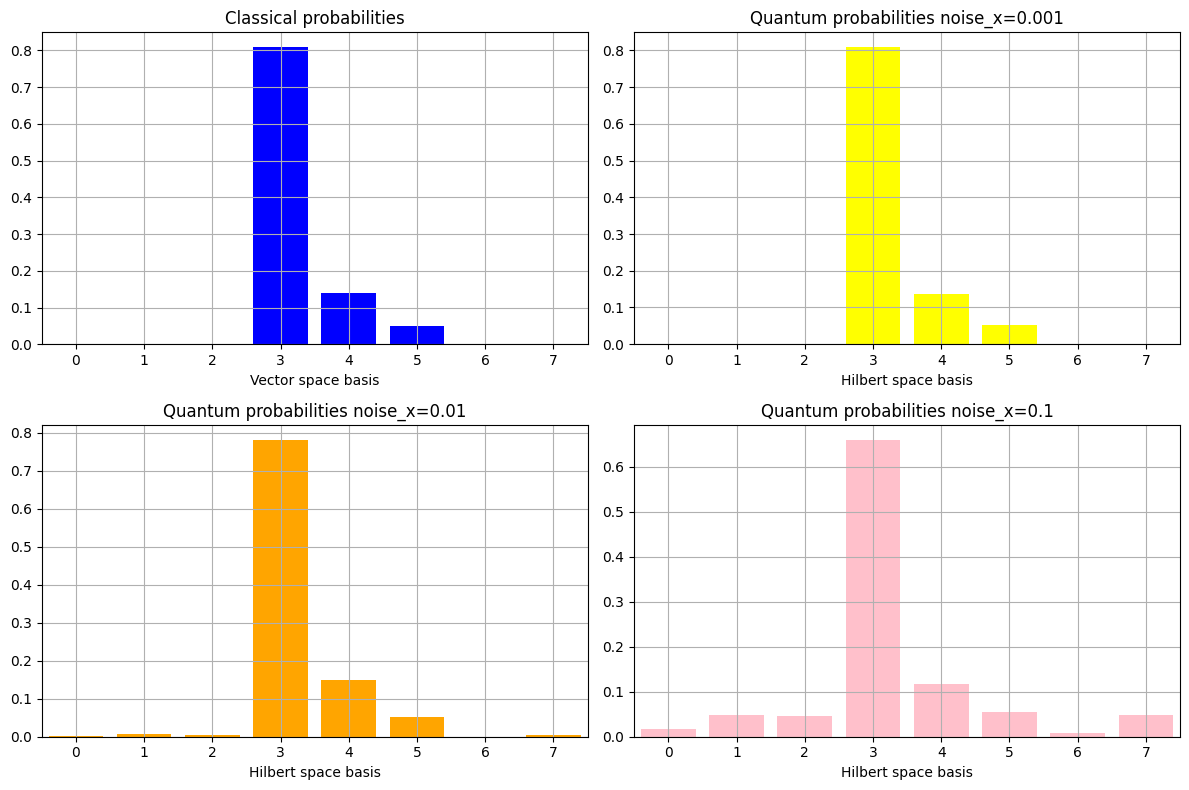

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(np.arange(0, 2 ** qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")
ax1.grid(True)  

ax2.bar(np.arange(0, 2 ** qubits), q_probs_1, color="yellow")
ax2.set_xlim(-0.5, 2 ** qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities noise_x=0.001")
ax2.grid(True)

ax3.bar(np.arange(0, 2 ** qubits), q_probs_2, color="orange")
ax3.set_xlim(-0.5, 2 ** qubits - 0.5)
ax3.set_xlabel("Hilbert space basis")
ax3.set_title("Quantum probabilities noise_x=0.01")
ax3.grid(True)

ax4.bar(np.arange(0, 2 ** qubits), q_probs_3, color="pink")
ax4.set_xlim(-0.5, 2 ** qubits - 0.5)
ax4.set_xlabel("Hilbert space basis")
ax4.set_title("Quantum probabilities noise_x=0.1")
ax4.grid(True)

# 调整布局以防止子图重叠
plt.tight_layout()
plt.show()